In [1]:
import pandas as pd
import os
import multiprocessing as mp
import feature_extractor
os.chdir('C:\\Users\\blake\\OneDrive - The University of Texas at Austin\\Project')
df = pd.DataFrame(columns=['title','tempo','zcr_mean','zcr_var','rmse_mean','rmse_var','centroid_mean','centroid_var','bandwidth_mean','bandwidth_var','contrast_mean','contrast_var','rolloff_mean','rolloff_var','flatness_mean','flatness_var','tempogram_ratio_mean','tempogram_ratio_var','harmonic_mean','harmonic_var','percussive_mean','percussive_var','mfcc1_mean','mfcc1_var','mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var','mfcc5_mean','mfcc5_var','mfcc6_mean','mfcc6_var','mfcc7_mean','mfcc7_var','mfcc8_mean','mfcc8_var','mfcc9_mean','mfcc9_var','mfcc10_mean','mfcc10_var','mfcc11_mean','mfcc11_var','mfcc12_mean','mfcc12_var','mfcc13_mean','mfcc13_var','mfcc14_mean','mfcc14_var','mfcc15_mean','mfcc15_var','mfcc16_mean','mfcc16_var','mfcc17_mean','mfcc17_var','mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var','subgenre'])
genre_path = 'Data\\metal_subgenres'
folder_path = ''
file_path = ''

In [2]:
def process_sub_genre(folder_path):
    feature_df = pd.DataFrame(columns=['title','tempo','zcr_mean','zcr_var','rmse_mean','rmse_var','centroid_mean','centroid_var','bandwidth_mean','bandwidth_var','contrast_mean','contrast_var','rolloff_mean','rolloff_var','flatness_mean','flatness_var','tempogram_ratio_mean','tempogram_ratio_var','harmonic_mean','harmonic_var','percussive_mean','percussive_var','mfcc1_mean','mfcc1_var','mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var','mfcc5_mean','mfcc5_var','mfcc6_mean','mfcc6_var','mfcc7_mean','mfcc7_var','mfcc8_mean','mfcc8_var','mfcc9_mean','mfcc9_var','mfcc10_mean','mfcc10_var','mfcc11_mean','mfcc11_var','mfcc12_mean','mfcc12_var','mfcc13_mean','mfcc13_var','mfcc14_mean','mfcc14_var','mfcc15_mean','mfcc15_var','mfcc16_mean','mfcc16_var','mfcc17_mean','mfcc17_var','mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var','subgenre'])
    dfs = []
    print('processing folder: ' + str(os.path.basename(folder_path)))
    for file in os.listdir(folder_path):
        file_path = folder_path + '\\' + file
        try:
            df = feature_extractor.extract_features_from_wav_file(file_path)
            df.subgenre = [str(os.path.basename(folder_path))]
            dfs.append(df)
        except:
            print('failed file: ' + file_path)
    
    feature_df = pd.concat(dfs)

    return feature_df

print(mp.cpu_count())

16


In [3]:
paths = []
features = []
for folder in os.listdir(genre_path):
    folder_path = genre_path + '\\' + folder 
    paths.append(folder_path)

for path in paths:
    features.append(process_sub_genre(path))

metal_features = pd.concat(features)


processing folder: alternative
processing folder: death


c:\Users\blake\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=8
  warnings.warn(


processing folder: folk


c:\Users\blake\OneDrive - The University of Texas at Austin\Project\Test Code\feature_extractor.py:11: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_file = librosa.load(audio_path, offset=60.0, duration=30.0)
c:\Users\blake\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
c:\Users\blake\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


failed file: Data\metal_subgenres\folk\Equilibrium - Ankunft--pV9vNpZYdo.wav
processing folder: glam
processing folder: industrial


c:\Users\blake\OneDrive - The University of Texas at Austin\Project\Test Code\feature_extractor.py:11: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_file = librosa.load(audio_path, offset=60.0, duration=30.0)
c:\Users\blake\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
c:\Users\blake\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


failed file: Data\metal_subgenres\industrial\Saw VI Soundtrack Commercial-WhgWxWQQYu4.wav
processing folder: metalcore
processing folder: nu
processing folder: NWOBHM
processing folder: progressive
processing folder: symphonic
processing folder: thrash


In [14]:

# print(metal_features)
subgenres = []
for path in paths:
    for file in os.listdir(path):
        subgenres.append(os.path.basename(path))

print(metal_features)
metal_features.to_csv('Data\\metal_features.csv')

                                                title       tempo  zcr_mean   
0    1. The Hollow - a perfect circle-avgiqNapUx0.wav  151.999081  0.074351  \
0   10 Years - Beautiful (Official Video)-C6iQpkkW...   66.256010  0.111619   
0                   10 Years - Fix Me-DCbkeUxkbYc.wav  161.499023  0.107580   
0             10 Years - Shoot It Out-3VCvSJo-yC0.wav  161.499023  0.110319   
0           10 Years - Waking Up [HD]-kHg_XwPuY2E.wav  151.999081  0.089109   
..                                                ...         ...       ...   
0   Wehrmacht - You Broke My Heart, So I Broke You...  172.265625  0.179256   
0    Whiplash - Power Thrashing Death-IVX4tumzsn0.wav   95.703125  0.156924   
0         Whiplash-Burning Of Atlanta-ByUD7JemXzU.wav   89.102909  0.158438   
0       XENTRIX - For Whose Advantage-_0M9Tl1fx4Y.wav  123.046875  0.144889   
0   𝗖𝗔𝗥𝗖𝗔𝗦𝗦 ''1985 † Thrasher's Abattoir'' [Melo D...   99.384014  0.130489   

     zcr_var  rmse_mean  rmse_var  centroid_mean   

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

def get_pca(X, y, num_components):
    pca = PCA(n_components=num_components)
    pca.fit(X)
    transformed_data = pca.transform(X)
    return transformed_data

# assign labels to numbers
def label_to_int(label):
    if label == 'alternative':
        return "blue"
    elif label == 'death':
        return "red"
    elif label == 'folk':
        return "green"
    elif label == 'glam':
        return "cyan"
    elif label == 'industrial':
        return "yellow"
    elif label == 'metalcore':
        return "#7FFF00"
    elif label == 'nu':
        return "gray"
    elif label == 'NWOBHM':
        return "black"
    elif label == 'progressive':
        return "orange"
    elif label == 'symphonic':
        return "purple"
    elif label == 'thrash':
        return "brown"

In [22]:
# load data from csv file
data_orig = pd.read_csv('Data/metal_features.csv')
labels = data_orig['subgenre']

# convert labels to numbers
labels = labels.apply(lambda x: label_to_int(x))
data = data_orig.drop(['title', 'subgenre'], axis=1, inplace=False)
print(data)

      Unnamed: 0       tempo  zcr_mean   zcr_var  rmse_mean  rmse_var   
0              0  151.999081  0.074351  0.001561   0.114258  0.002752  \
1              0   66.256010  0.111619  0.004041   0.018642  0.000021   
2              0  161.499023  0.107580  0.002811   0.084716  0.000365   
3              0  161.499023  0.110319  0.002615   0.076693  0.000777   
4              0  151.999081  0.089109  0.001700   0.152179  0.003460   
...          ...         ...       ...       ...        ...       ...   
2003           0  172.265625  0.179256  0.003895   0.054047  0.000416   
2004           0   95.703125  0.156924  0.000821   0.159225  0.001927   
2005           0   89.102909  0.158438  0.000756   0.158723  0.000822   
2006           0  123.046875  0.144889  0.001550   0.060306  0.000275   
2007           0   99.384014  0.130489  0.000954   0.139728  0.001106   

      centroid_mean   centroid_var  bandwidth_mean  bandwidth_var  ...   
0       2181.215203  482610.507049     2558.85066

C:\Users\blake\AppData\Local\Temp\ipykernel_13636\586746675.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')


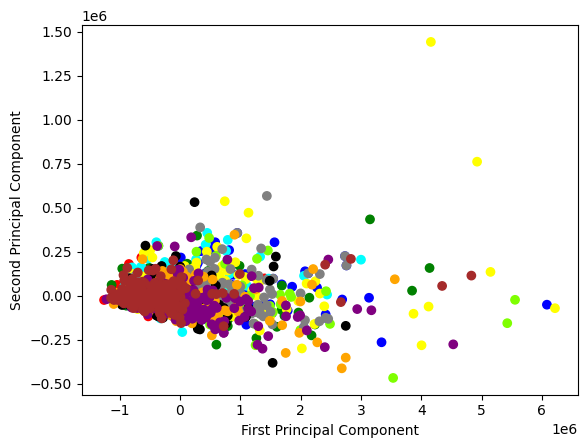

In [23]:
transformed_data_2d = get_pca(data, labels, 2)

plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

C:\Users\blake\AppData\Local\Temp\ipykernel_13636\2381365623.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], transformed_data_2d[:, 2], c=labels, cmap='viridis')


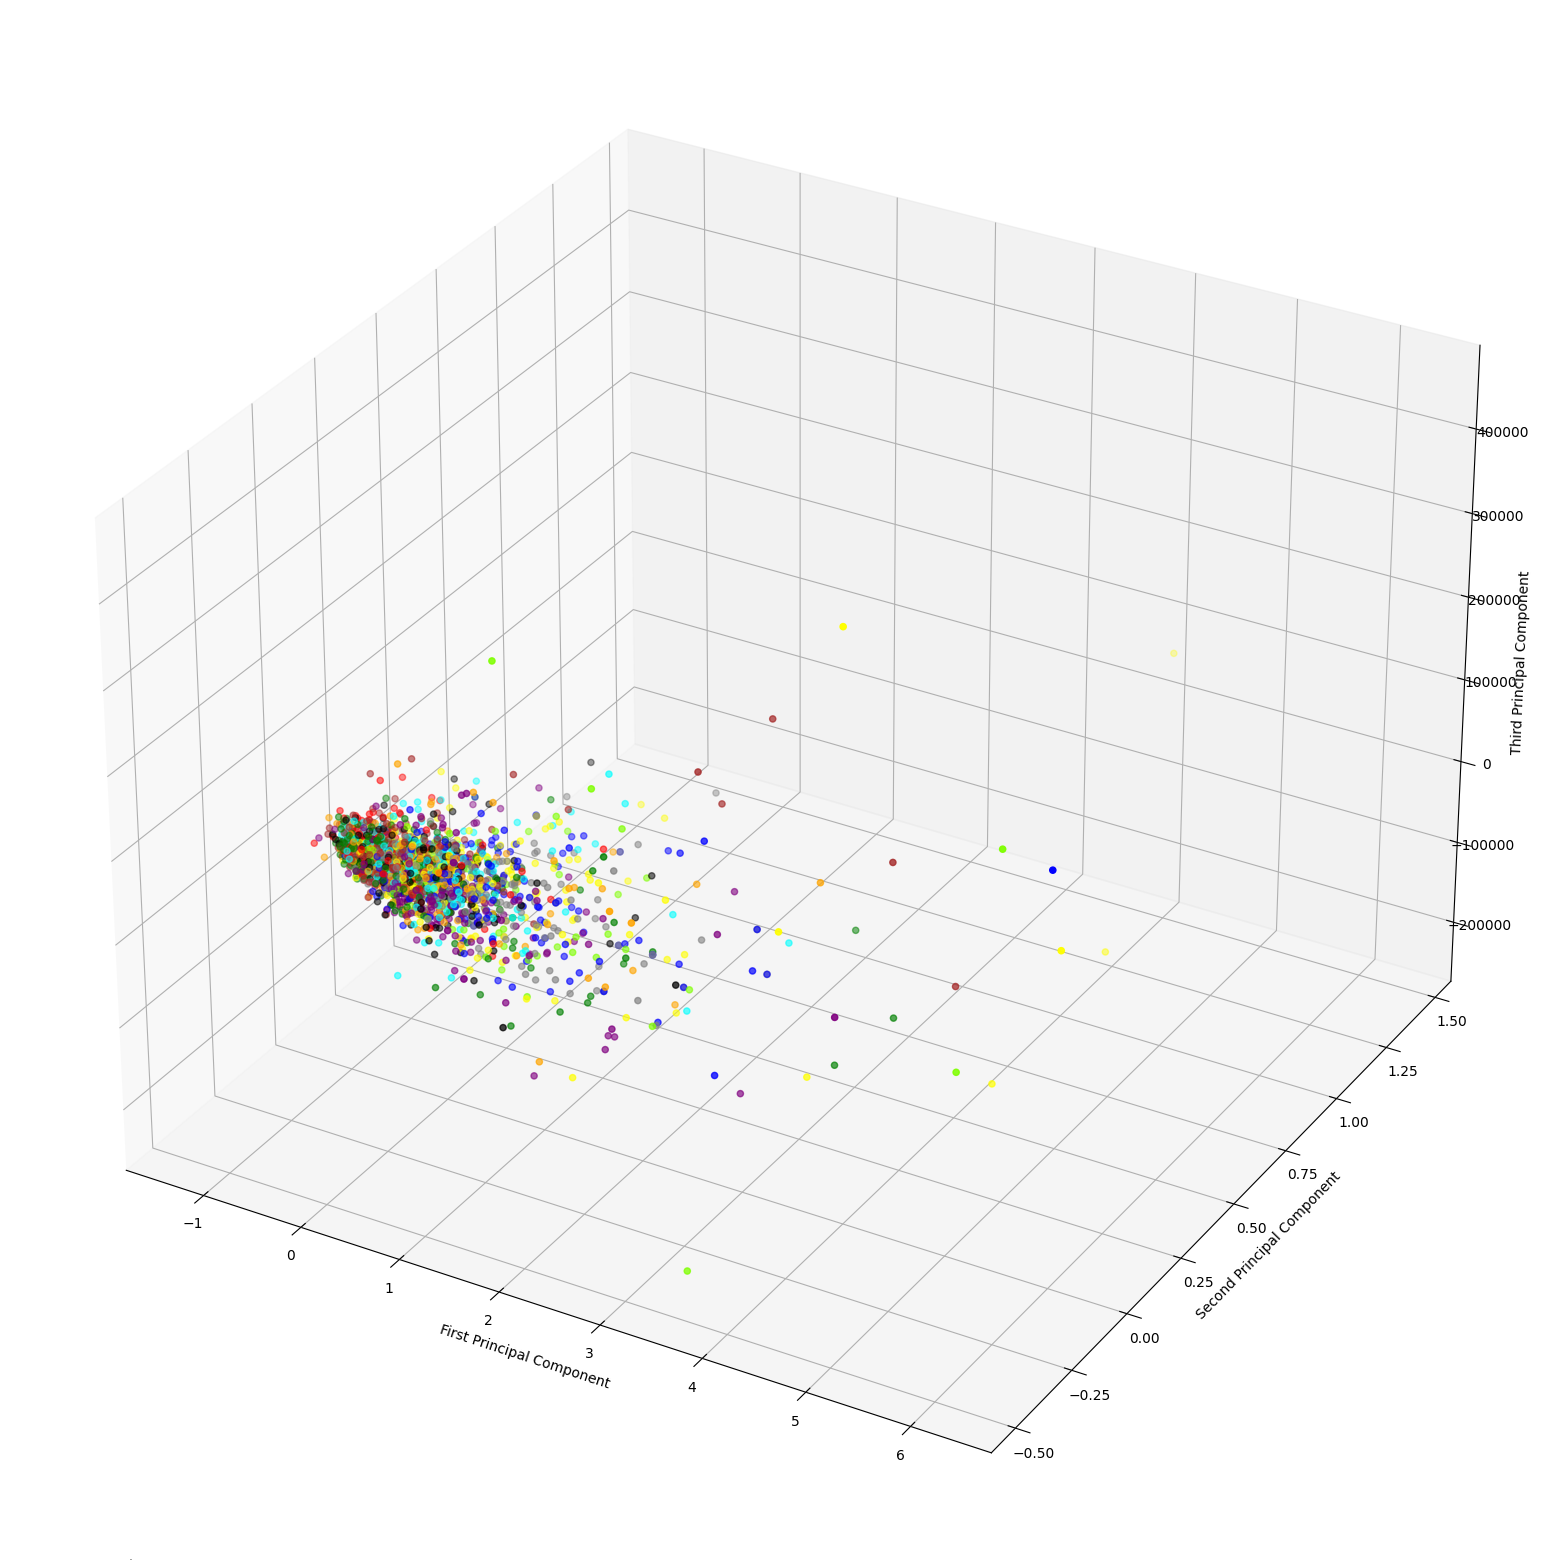

In [24]:
from mpl_toolkits.mplot3d import Axes3D

transformed_data_2d = get_pca(data, labels, 3)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], transformed_data_2d[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()

C:\Users\blake\AppData\Local\Temp\ipykernel_13636\733533381.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')


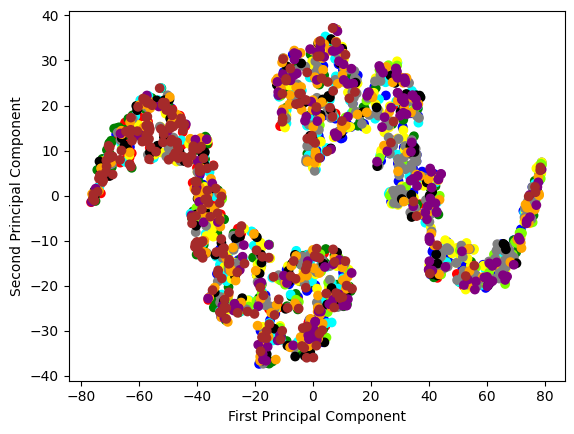

In [25]:
from sklearn.manifold import TSNE

def get_tsne(X, y, num_components):
    tsne = TSNE(n_components=num_components)
    transformed_data = tsne.fit_transform(X)
    return transformed_data

transformed_data_2d = get_tsne(data, labels, 2)
plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

C:\Users\blake\AppData\Local\Temp\ipykernel_13636\3289265566.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(transformed_data_3d[:, 0], transformed_data_3d[:, 1], transformed_data_3d[:, 2], c=labels, cmap='viridis')


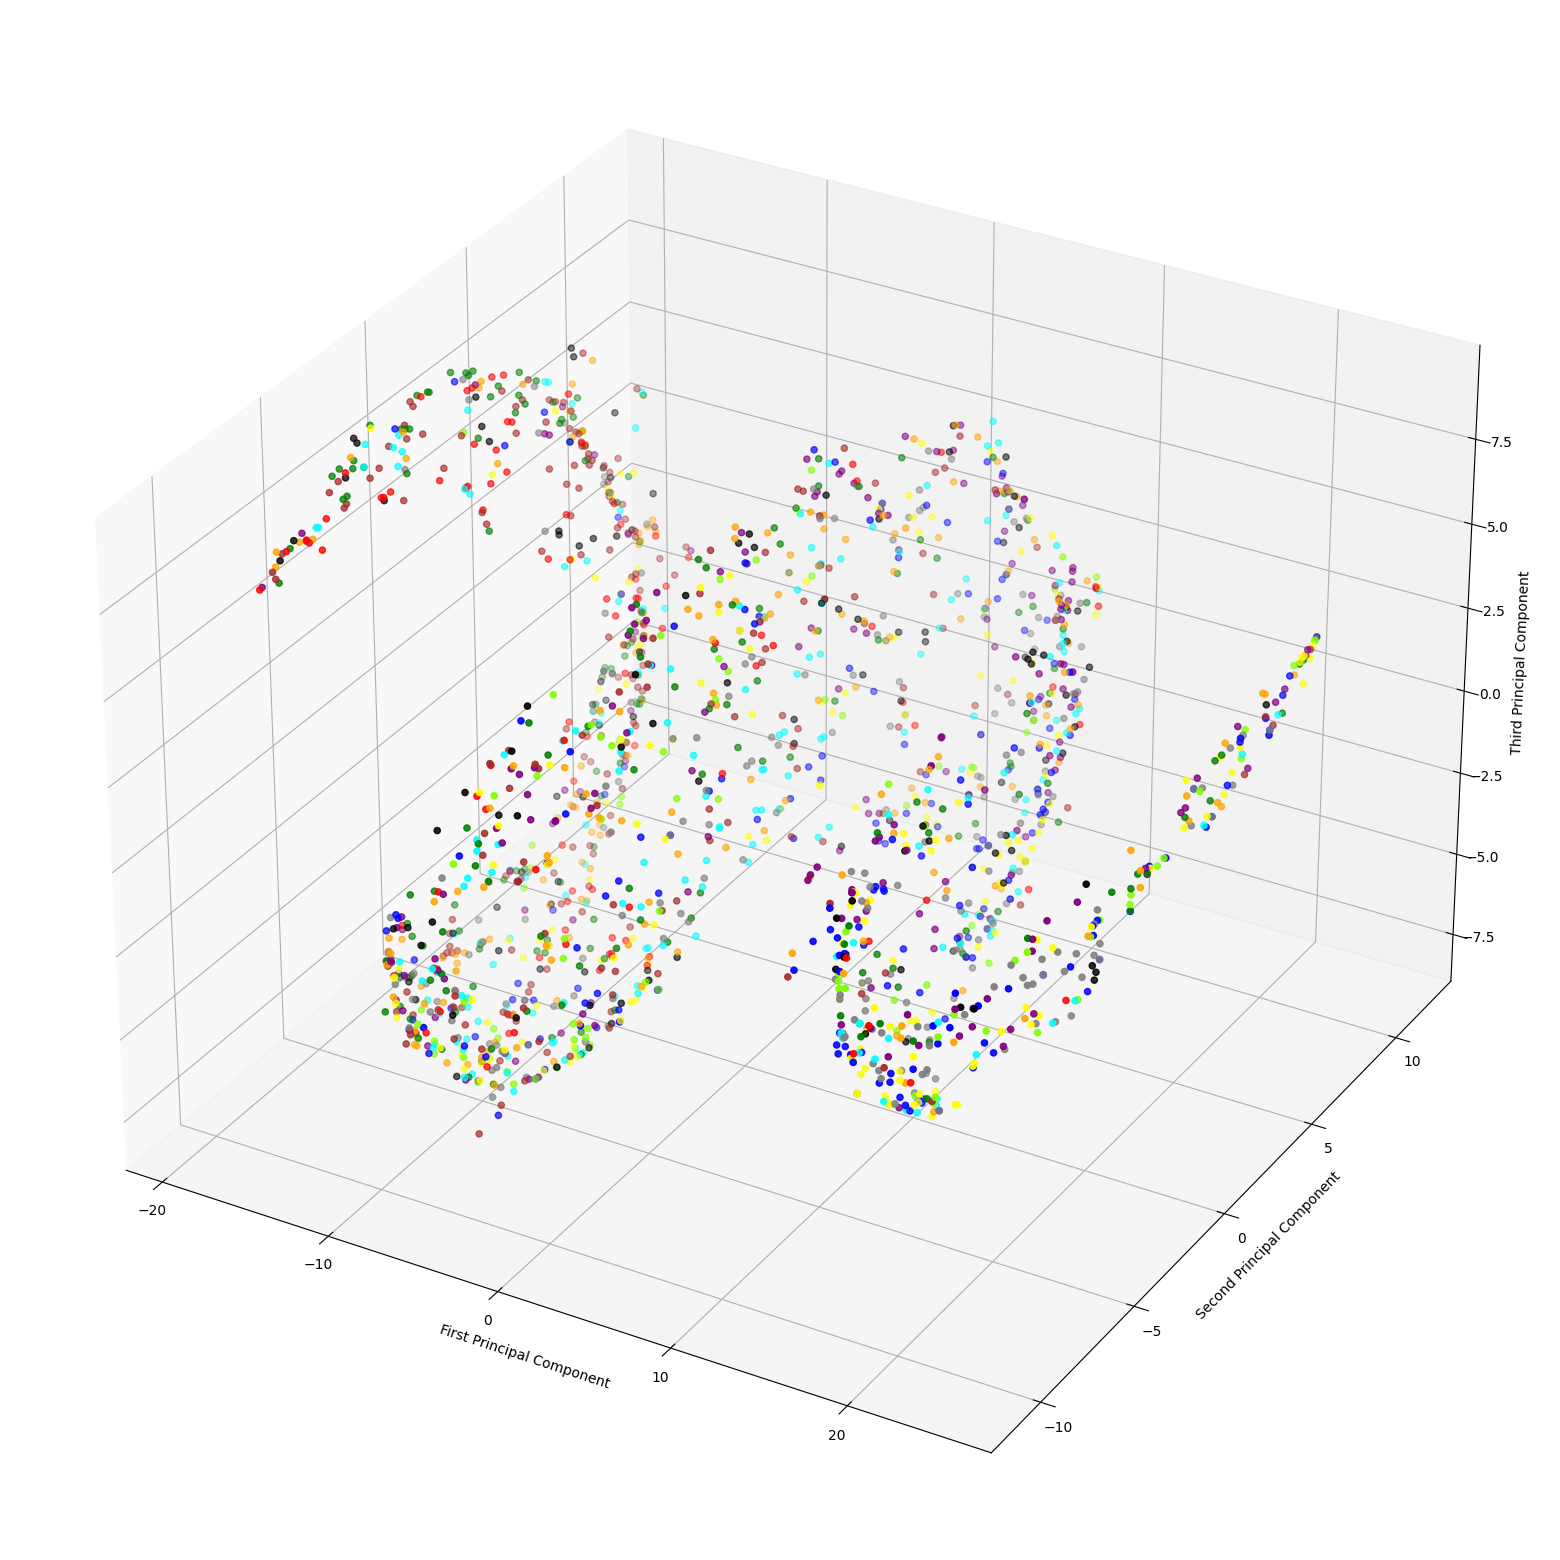

In [26]:
transformed_data_3d = get_tsne(data, labels, 3)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data_3d[:, 0], transformed_data_3d[:, 1], transformed_data_3d[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()

In [27]:
data = (data - np.min(data)) / (np.max(data) - np.min(data))

C:\Users\blake\AppData\Local\Temp\ipykernel_13636\586746675.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')


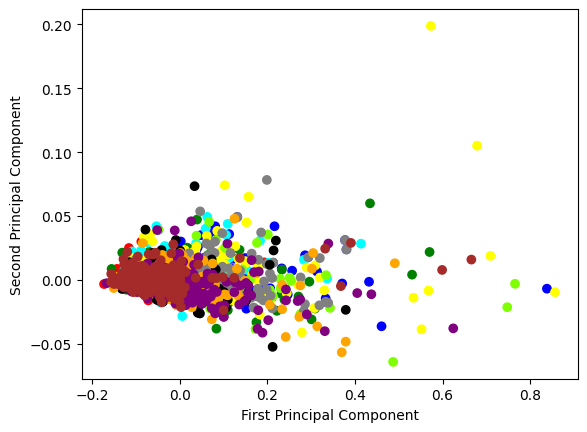

In [28]:
transformed_data_2d = get_pca(data, labels, 2)

plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

C:\Users\blake\AppData\Local\Temp\ipykernel_13636\2381365623.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], transformed_data_2d[:, 2], c=labels, cmap='viridis')


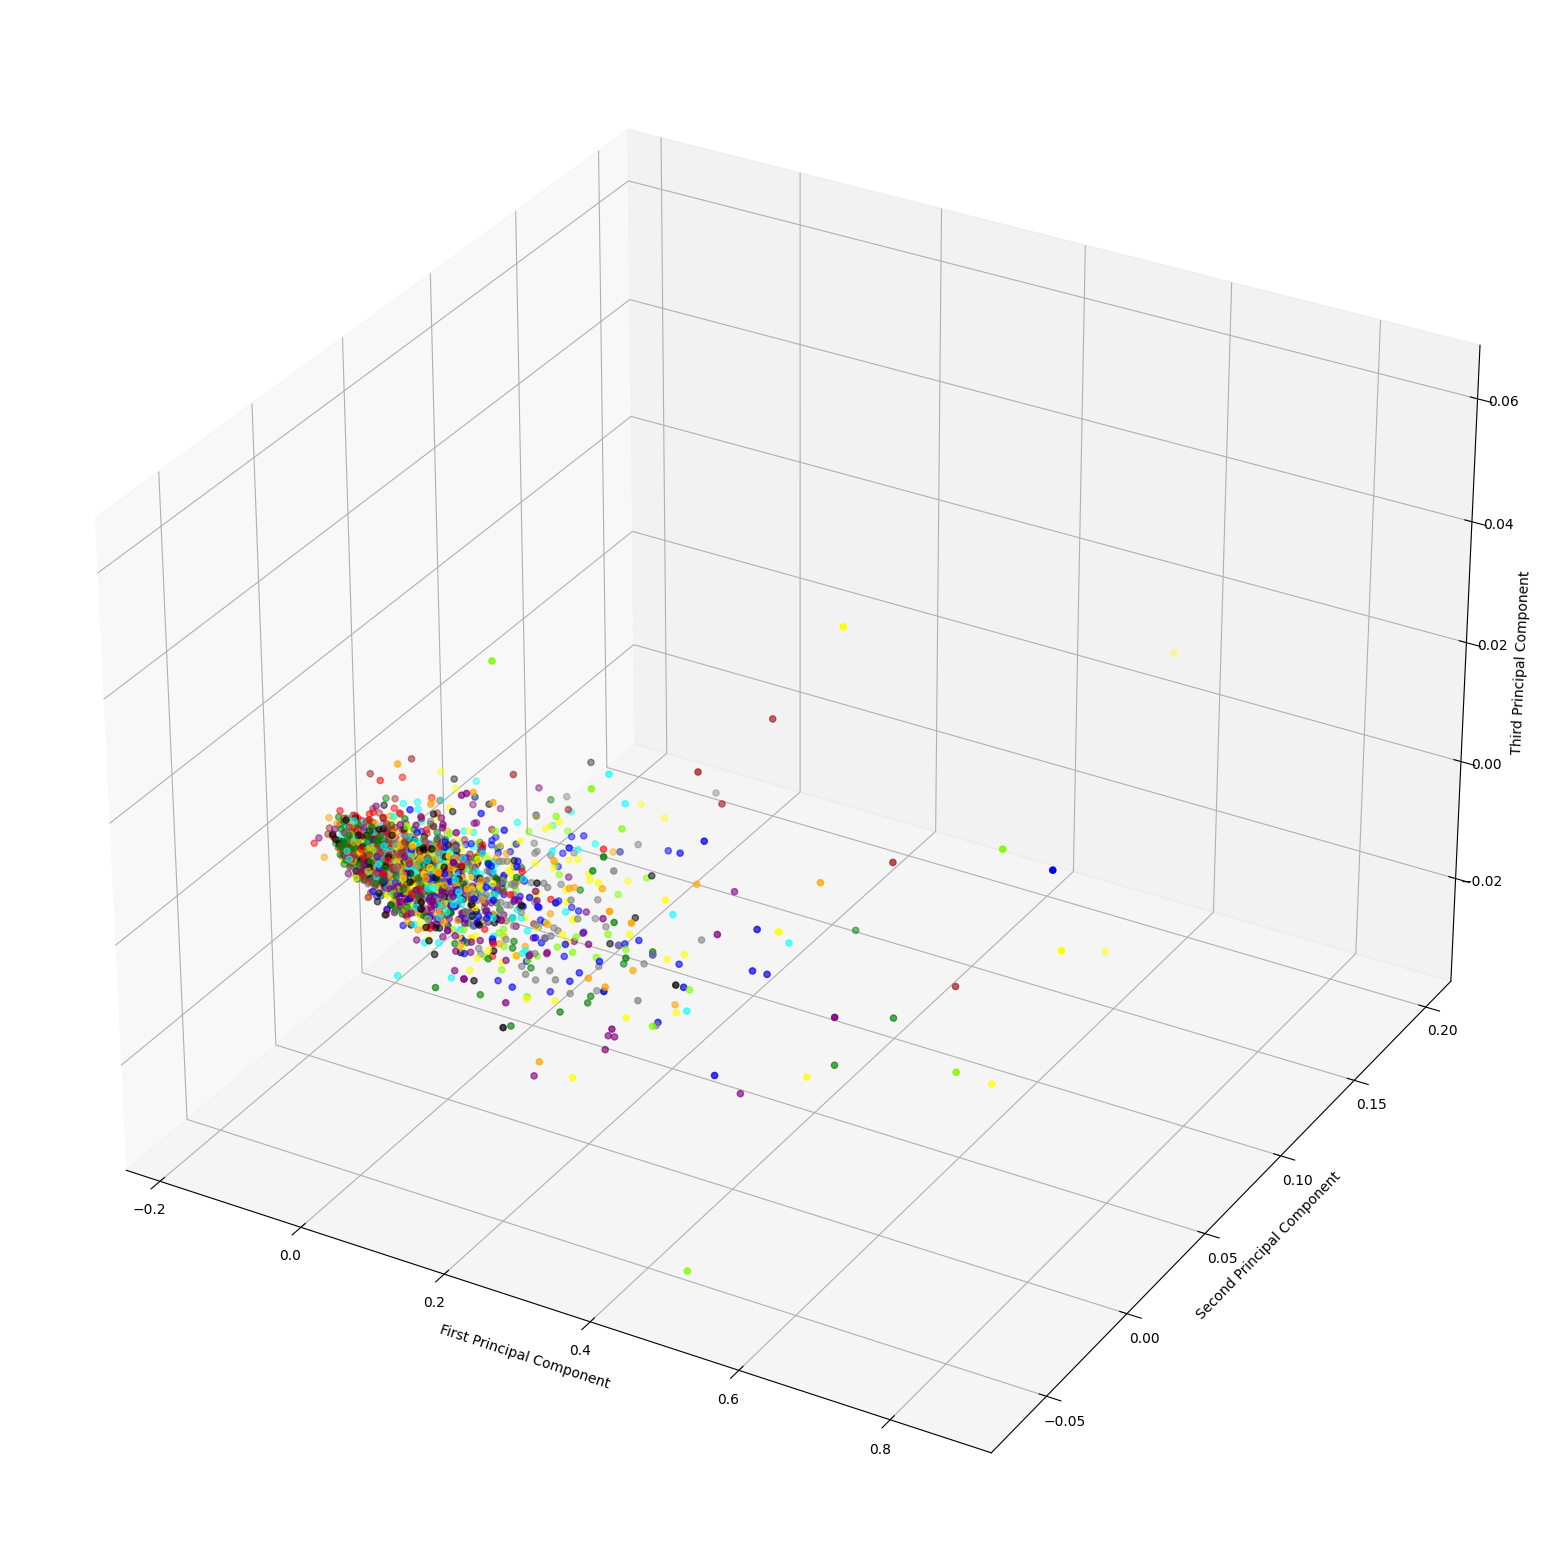

In [29]:
from mpl_toolkits.mplot3d import Axes3D

transformed_data_2d = get_pca(data, labels, 3)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], transformed_data_2d[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()

C:\Users\blake\AppData\Local\Temp\ipykernel_13636\733533381.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')


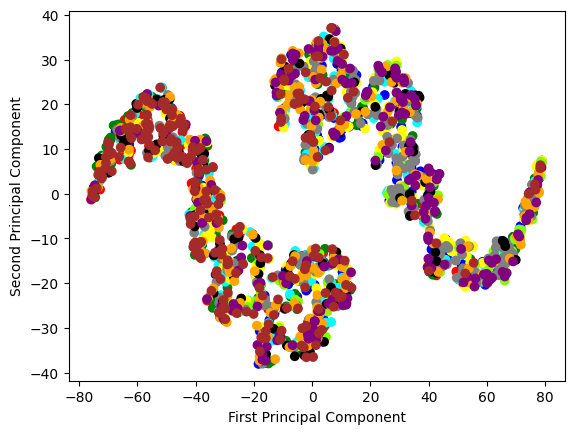

In [30]:
from sklearn.manifold import TSNE

def get_tsne(X, y, num_components):
    tsne = TSNE(n_components=num_components)
    transformed_data = tsne.fit_transform(X)
    return transformed_data

transformed_data_2d = get_tsne(data, labels, 2)
plt.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], c=labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

C:\Users\blake\AppData\Local\Temp\ipykernel_13636\3252269580.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(transformed_data_3d[:, 0], transformed_data_3d[:, 1], transformed_data_3d[:, 2], c=labels, cmap='viridis')


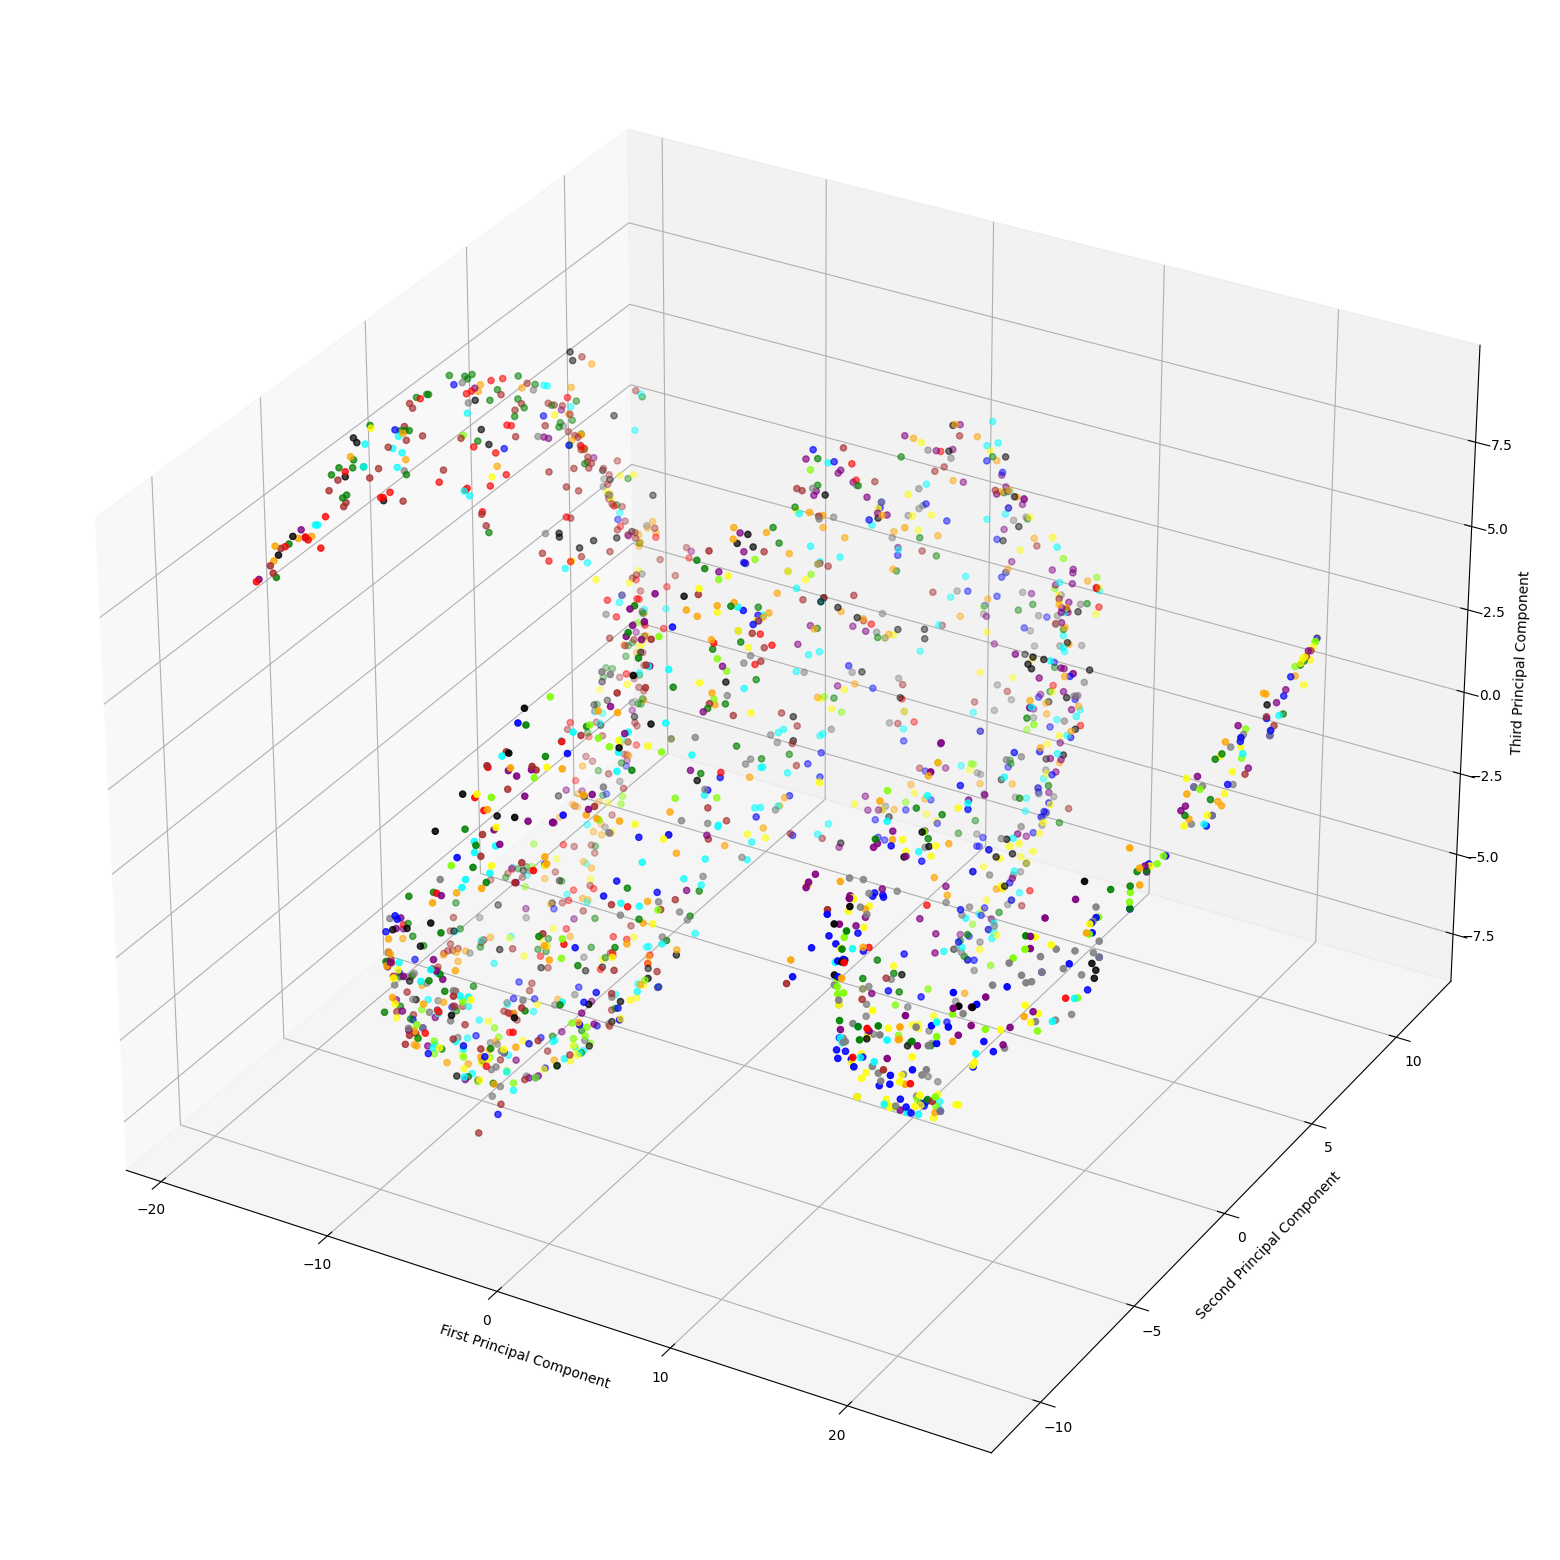

In [31]:
transformed_data_3d = get_tsne(data, labels, 3)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data_3d[:, 0], transformed_data_3d[:, 1], transformed_data_3d[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()
